In [1]:
import pandas as pd

In [2]:
df_l = pd.read_csv('listing_aggregated_view_0505')
#df = pd.read_csv('listing_2804')
df = pd.read_csv('inv_listing_1705')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,4,14,17,20,24,27,28,33,42,49,52,53,54,60,61,62,66,68,70,81,83,85,88,90,93,102,107,110,119,120,121,122,123,124,125,129,130,132,133,134,136,137,138,139,140,141,144,145,146,147,148,149,150,151,152,153,154,155,156,157) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_sn = pd.read_csv('listing_snapshot_marchapril')

In [4]:
df_l.head()

,Unnamed: 0,original_listing_id,original_dealer_id,no_of_message_leads,no_of_ga_pdp_views,no_of_ga_pdp_views_from_gold_listing,no_of_ga_pdp_views_from_premium_listing,no_of_ga_unique_pdp_views,no_of_ga_call_leads
0,0,41445,1001,0,0,0,0,0,0
1,1,66237,1001,0,0,0,0,0,0
2,2,66244,1001,1,105,0,0,91,0
3,3,66246,1001,0,1,0,0,1,0
4,4,66251,1001,0,1,0,0,1,0


In [5]:
df_m = pd.merge(df_l, df, left_on = 'original_listing_id', right_on= 'id')

In [7]:
df_m.count()

Unnamed: 0_x                             1795193
original_listing_id                      1795193
original_dealer_id                       1795193
no_of_message_leads                      1795193
no_of_ga_pdp_views                       1795193
                                          ...   
is_first_owner                                 2
battery_acquisition                            2
is_damaged                                     2
is_min_one_year_free_service_included          2
rn                                       1795193
Length: 168, dtype: int64

In [12]:
df_m['d_date_timestamp'] = pd.to_datetime(df_m.deactivation_date)

In [14]:
first_april = pd.to_datetime('2021-04-01')

In [20]:
# the listings created later than 01.04
#((df_m.deactivation_date.isnull())|(df_m.d_date_timestamp>first_april))
d_a = df_m[(pd.to_datetime(df_m.created_date)>first_april)]

In [21]:
list(d_a.columns)

['Unnamed: 0_x',
 'original_listing_id',
 'original_dealer_id_x',
 'no_of_message_leads',
 'no_of_ga_pdp_views',
 'no_of_ga_pdp_views_from_gold_listing',
 'no_of_ga_pdp_views_from_premium_listing',
 'no_of_ga_unique_pdp_views',
 'no_of_ga_call_leads',
 'Unnamed: 0_y',
 'original_dealer_id_y',
 'external_listing_id',
 'source',
 'tsn',
 'price',
 'body_type',
 'fuel_type',
 'transmission_type',
 'drive_type',
 'mileage',
 'horse_power',
 'production_year',
 'first_registration_date',
 'gbd_score',
 'spin_360_code_indicator',
 'make_key',
 'make',
 'model_key',
 'model',
 'type_id',
 'detected_type_id',
 'type',
 'type_full',
 'body_color',
 'body_color_group',
 'active_indicator',
 'publishing_status',
 'catalogued_indicator',
 'publishing_date',
 'deactivation_date',
 'created_date',
 'last_modified_date',
 'live_indicator',
 'd_date_timestamp']

In [23]:
d_a['views_total'] = d_a['no_of_ga_pdp_views'] 
d_a['views_unique'] = d_a['no_of_ga_unique_pdp_views']
d_a['views_paid'] = d_a['no_of_ga_pdp_views_from_gold_listing'] + d_a['no_of_ga_pdp_views_from_premium_listing']
d_a['leads_total'] = d_a['no_of_message_leads'] + d_a['no_of_ga_call_leads']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [30]:
def ctr(df):
    if df.views_total==0:
        return 0
    else:
        return df.leads_total/df.views_total

In [31]:
d_a['ctr'] = d_a.apply(ctr, axis = 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
d_a.ctr.mean()

0.0016749045164762678

In [34]:
d_a.groupby(['source'])['ctr'].mean()

source
DEALER_PLATFORM    0.005619
MANUAL             0.010017
TDA                0.000003
TUTTI              0.000001
Name: ctr, dtype: float64

In [35]:
d_a[d_a.source.isin(['DEALER_PLATFORM', 'MANUAL'])].ctr.mean()

0.006184685365724755

In [37]:
first_jan = pd.to_datetime('2021-01-01')
df_ma = df_m[(pd.to_datetime(df_m.created_date)<first_april)&((pd.to_datetime(df_m.created_date)>first_jan))&(df_m.d_date_timestamp<first_april)]

In [38]:
df_ma['views_total'] = df_ma['no_of_ga_pdp_views'] 
df_ma['views_unique'] = df_ma['no_of_ga_unique_pdp_views']
df_ma['views_paid'] = df_ma['no_of_ga_pdp_views_from_gold_listing'] + df_ma['no_of_ga_pdp_views_from_premium_listing']
df_ma['leads_total'] = df_ma['no_of_message_leads'] + df_ma['no_of_ga_call_leads']
df_ma['ctr'] = df_ma.apply(ctr, axis = 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [39]:
df_ma[df_ma.source.isin(['DEALER_PLATFORM', 'MANUAL'])].ctr.mean()

0.008947046037600909

In [46]:
df_ma[df_ma.source.isin(['DEALER_PLATFORM', 'MANUAL'])].price.mean()

30604.54411667856

In [47]:
d_a[d_a.source.isin(['DEALER_PLATFORM', 'MANUAL'])].price.mean()

31157.425619774094

In [62]:
df_sn[df_sn.date_key<20210401].count()

Unnamed: 0                        5777501
date_key                          5777501
listing_key                       5777501
dealer_key                        5777501
quantity                          5777501
price                             5777501
age                               5777501
no_of_message_leads               5777501
no_of_ga_pdp_views                5777501
no_of_ga_unique_pdp_views         5777501
no_of_ga_call_leads               5777501
no_of_ga_message_leads            5777501
no_of_ga_whatsapp_leads           5777501
no_of_ga_call_leads_unfactored    5777501
no_of_comparis_message_leads      5777501
no_of_tutti_message_leads         5777501
dtype: int64

In [63]:
df_sn[df_sn.date_key>20210401].count()

Unnamed: 0                        5410348
date_key                          5410348
listing_key                       5410348
dealer_key                        5410348
quantity                          5410348
price                             5410348
age                               5410348
no_of_message_leads               5410348
no_of_ga_pdp_views                5410348
no_of_ga_unique_pdp_views         5410348
no_of_ga_call_leads               5410348
no_of_ga_message_leads            5410348
no_of_ga_whatsapp_leads           5410348
no_of_ga_call_leads_unfactored    5410348
no_of_comparis_message_leads      5410348
no_of_tutti_message_leads         5410348
dtype: int64

In [50]:
df_sn.price.mean()

32427.44087015078

In [58]:
x = df_sn[df_sn.no_of_ga_pdp_views!=0].groupby(['listing_key'])['price'].mean().reset_index()
x.price.mean()

28751.89247956852

In [59]:
x.price.median()

18900.0

In [77]:
x = df_sn[(df_sn.date_key<20210401)&(df_sn.no_of_ga_pdp_views!=0)].groupby(['listing_key'])['price'].max().reset_index()
x.price.mean(), x.price.median()

(28342.06933548874, 17990.0)

In [78]:
x = df_sn[(df_sn.date_key>=20210401)&(df_sn.no_of_ga_pdp_views!=0)].groupby(['listing_key'])['price'].max().reset_index()
x.price.mean(), x.price.median()

(28793.091591650693, 18900.0)

In [88]:
x = df_sn[(df_sn.date_key<20210401)].groupby(['listing_key'])['price'].max().reset_index()
x.price.mean(), x.price.median()

(31643.191313946365, 23900.0)

In [76]:
x = df_sn[(df_sn.date_key>=20210401)].groupby(['listing_key'])['price'].max().reset_index()
x.price.mean(), x.price.median()

(30030.064535343317, 22300.0)

In [70]:
df_sn[(df_sn.date_key>=20210401)].head()

,Unnamed: 0,date_key,listing_key,dealer_key,quantity,price,age,no_of_message_leads,no_of_ga_pdp_views,no_of_ga_unique_pdp_views,no_of_ga_call_leads,no_of_ga_message_leads,no_of_ga_whatsapp_leads,no_of_ga_call_leads_unfactored,no_of_comparis_message_leads,no_of_tutti_message_leads
5687695,5687695,20210401,2804891,356053,1,20500.0,388,0,0,0,0,0,0,0,0,0
5687696,5687696,20210401,2954005,405192,1,23000.0,363,0,3,3,0,0,0,0,0,0
5687697,5687697,20210401,2958258,451713,1,22000.0,471,0,0,0,0,0,0,0,0,0
5687698,5687698,20210401,2970967,550491,1,49900.0,302,0,0,0,0,0,0,0,0,0
5687699,5687699,20210401,2990089,613058,1,25900.0,289,0,0,0,0,0,0,0,0,0


In [87]:
df_m[(pd.to_datetime(df_m.created_date)<first_april)&((pd.to_datetime(df_m.created_date)>first_jan))].price.mean()

23353.49182957169

In [86]:
df_m[(pd.to_datetime(df_m.created_date)>=first_april)].price.mean()

22301.582001450803

In [83]:
x = ['Jan - March 2021', 'April 2021']
y1 = [13999, 13500 ]

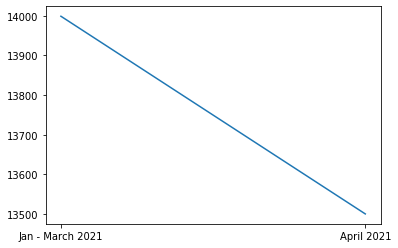

In [85]:
import matplotlib.pyplot as plt
plt.plot(x, y1)

In [97]:
x = df_sn[(df_sn.date_key<20210401)].groupby(['listing_key'])['age'].mean().reset_index()
x.age.mean(), x.age.median()

(71.32228168655236, 25.0)

In [98]:
x = df_sn[(df_sn.date_key>20210401)].groupby(['listing_key'])['age'].mean().reset_index()
x.age.mean(), x.age.median()

(86.46158177565523, 40.5)

In [89]:
x = df_sn[(df_sn.date_key<20210401)&(df_sn.no_of_ga_pdp_views!=0)].groupby(['listing_key'])['age'].mean().reset_index()
x.age.mean(), x.age.median()

(71.1676417478569, 24.0)

In [90]:
x = df_sn[(df_sn.date_key>=20210401)&(df_sn.no_of_ga_pdp_views!=0)].groupby(['listing_key'])['age'].mean().reset_index()
x.age.mean(), x.age.median()

(84.82287111545958, 37.0)

In [92]:
df_m[(pd.to_datetime(df_m.created_date)>=first_april)].original_listing_id.count()

75907

In [94]:
df_m[(pd.to_datetime(df_m.created_date)<first_april)&(pd.to_datetime(df_m.created_date)>=pd.to_datetime('20210301'))].original_listing_id.count()

114396

In [96]:
df_m[(pd.to_datetime(df_m.created_date)<pd.to_datetime('20210301'))&(pd.to_datetime(df_m.created_date)>=pd.to_datetime('20210201'))].original_listing_id.count()

109283

In [99]:
df_mes = pd.read_csv('message_leads')

In [101]:
df_mes[pd.to_datetime(df_mes.created_date)<pd.to_datetime('20210401')]['original_listing_id'].count()

14096

In [102]:
df_mes[pd.to_datetime(df_mes.created_date)>pd.to_datetime('20210401')]['original_listing_id'].count()

11473

In [103]:
df_mes.head()

,Unnamed: 0,date_key,dealer_key,listing_key,original_message_lead_id,original_listing_id,created_date,email,phone,language,first_name,last_name,message,source,status,quantity,listing_price,listing_age,load_date
0,0,20210301,329852,7981326,236342,1594516,2021-03-01 20:45:07.164699,peterhaag@bluewin.ch,796631639.0,de,Peter,Haag,Guten Tag Ich interessiere mich für das Fahrze...,COMPARIS,verified,1,34500.0,19,2021-03-02 01:25:09.347000
1,1,20210301,330718,7991800,236237,1602484,2021-03-01 17:57:51.227473,marekchabuz12@gimail.com,762331728.0,fr,Marek,Chabuz,"Bonjour, Je suis intéressé par votre annonce V...",CARFORYOU,verified,1,11990.0,18,2021-03-01 19:24:13.890000
2,2,20210301,331682,7992618,235920,1582754,2021-03-01 07:18:34.865421,schwyz.finanzberater@gmail.com,797393054.0,de,Rinaldo,Maissen,Guten Tag Ich interessiere mich für das Fahrze...,COMPARIS,verified,1,9850.0,23,2021-03-01 13:24:12.779000
3,3,20210301,487125,7996699,236103,1594768,2021-03-01 13:10:14.227938,zemifes525@gmail.com,787312214.0,de,Zemichael,Fessehaye,"Grüezi, Ich interessiere mich für Ihr Inserat ...",CARFORYOU,verified,1,16000.0,19,2021-03-01 19:24:13.890000
4,4,20210301,330528,8038111,235951,1606039,2021-03-01 08:28:38.239721,freiraumallerhand@bluewin.ch,788000044.0,de,Ursula,Schwob,"Grüezi, Ich interessiere mich für Ihr Inserat ...",CARFORYOU,verified,1,1300.0,17,2021-03-01 13:24:12.779000


In [118]:
d_top_march = df_mes[pd.to_datetime(df_mes.created_date)<pd.to_datetime('20210401')].groupby(['dealer_key'])['original_message_lead_id'].count().reset_index().sort_values(by='original_message_lead_id', ascending = False)

In [119]:
d_top_apr = df_mes[pd.to_datetime(df_mes.created_date)>=pd.to_datetime('20210401')].groupby(['dealer_key'])['original_message_lead_id'].count().reset_index().sort_values(by='original_message_lead_id', ascending = False)

In [110]:
df_sn.head()

,Unnamed: 0,date_key,listing_key,dealer_key,quantity,price,age,no_of_message_leads,no_of_ga_pdp_views,no_of_ga_unique_pdp_views,no_of_ga_call_leads,no_of_ga_message_leads,no_of_ga_whatsapp_leads,no_of_ga_call_leads_unfactored,no_of_comparis_message_leads,no_of_tutti_message_leads
0,0,20210301,2203434,577478,1,7900.0,334,0,0,0,0,0,0,0,0,0
1,1,20210301,2500697,341383,1,16900.0,287,0,2,2,0,0,0,0,0,0
2,2,20210301,2570770,414654,1,250.0,283,0,1,1,0,0,0,0,0,0
3,3,20210301,2610933,406976,1,3700.0,281,0,1,1,0,0,0,0,0,0
4,4,20210301,2670679,534470,1,24800.0,338,0,0,0,0,0,0,0,0,0


In [113]:
dd = pd.read_csv('dealer')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,5,6,7,14,15,25,27,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [115]:
dd[dd.dealer_key==331938]

,Unnamed: 0,dealer_key,original_dealer_id,external_dealer_id,name,zip_code,zip_code_group_one,zip_code_group_two,city,country,...,row_expiration_date,load_date,current_row_indicator,row_sha,canton,dealer_type,dealer_source,dealer_source_group,sfdc_customer_segment,sfdc_cfy_transaction_contract_indicator
631392,631392,331938,1019,403544592,Global Car Trading AG Lager,8834,8,88,Schindellegi-Feusisberg,CH,...,9999-12-31 23:59:59,2020-08-10 07:21:29.130000,True,a116d017095787eab6401ad30cb870eb87485230a8e968...,Zürich,professional,SALESFORCE,carforyou,A,invalid


In [120]:
list(dd.columns)

['Unnamed: 0',
 'dealer_key',
 'original_dealer_id',
 'external_dealer_id',
 'name',
 'zip_code',
 'zip_code_group_one',
 'zip_code_group_two',
 'city',
 'country',
 'source',
 'sfdc_account_id',
 'sfdc_cfy_base_contract_indicator',
 'sfdc_cfy_spin360_contract_indicator',
 'dh_account_status',
 'account_registration_complete_indicator',
 'active_indicator',
 'valid_contract_indicator',
 'created_date',
 'last_modified_date',
 'row_effective_date',
 'row_expiration_date',
 'load_date',
 'current_row_indicator',
 'row_sha',
 'canton',
 'dealer_type',
 'dealer_source',
 'dealer_source_group',
 'sfdc_customer_segment',
 'sfdc_cfy_transaction_contract_indicator']

In [199]:
d_march_m = pd.merge(d_top_march, dd[['dealer_key', 'name', 'zip_code', 'sfdc_cfy_transaction_contract_indicator','source', 'canton', 'sfdc_customer_segment', 'dealer_type']], 
        on='dealer_key')

In [126]:
d_march_m.head(10)

,dealer_key,original_message_lead_id,name,zip_code,source,canton,sfdc_customer_segment,dealer_type
0,331938,286,Global Car Trading AG Lager,8834,Spider,Zürich,A,professional
1,330718,118,"Auto Blitz AG, Teufenthal",5723,Spider,Aargau,B,professional
2,331924,96,Auto-Center Grenchen AG,2540,Spider,Bern,A,professional
3,331664,90,TANI Automobile,8400,Spider,Zürich,C,professional
4,584354,85,Rallph Hoffmann,8493,NaN,NaN,NaN,private
5,353109,81,CSC Automobile GmbH,5722,Spider,Aargau,C,professional
6,333207,81,"Auto Blitz AG, Auw",5644,Spider,Aargau,C,professional
7,332155,77,Autohaus Schiess AG,8604,Spider,Zürich,A,professional
8,333675,75,K & S Auto GmbH,9430,Spider,St. Gallen,B,professional
9,330692,73,Auto Tiptop GmbH,4702,Spider,Solothurn,C,professional


In [200]:
d_apr_m = pd.merge(d_top_apr, dd[['dealer_key', 'name', 'zip_code', 'source', 'canton', 'sfdc_cfy_transaction_contract_indicator','sfdc_customer_segment', 'dealer_type']], 
        on='dealer_key')

In [127]:
d_apr_m.head(10)

,dealer_key,original_message_lead_id,name,zip_code,source,canton,sfdc_customer_segment,dealer_type
0,331938,208,Global Car Trading AG Lager,8834,Spider,Zürich,A,professional
1,330718,115,"Auto Blitz AG, Teufenthal",5723,Spider,Aargau,B,professional
2,535661,80,Auto SAM-Export,3286,CARFORYOU (manuell),NaN,C,professional
3,618812,73,Quirine Aktas,6000,NaN,NaN,NaN,private
4,325540,69,Elite Garage AG Zuzwil,9524,Spider,St. Gallen,A,professional
5,353109,67,CSC Automobile GmbH,5722,Spider,Aargau,C,professional
6,332779,65,Winkelbüel Garage AG,6330,Spider,Zug,A,professional
7,333743,63,"Auto Kunz AG, Wohlen",5610,Spider,Aargau,A,professional
8,331924,63,Auto-Center Grenchen AG,2540,Spider,Bern,A,professional
9,330692,59,Auto Tiptop GmbH,4702,Spider,Solothurn,C,professional


In [151]:
d_apr_m.count()

dealer_key                  2612
original_message_lead_id    2612
name                        2612
zip_code                    2612
source                      1340
canton                      1001
sfdc_customer_segment       1336
dealer_type                 2612
dtype: int64

In [128]:
d_apr_m[d_apr_m.dealer_key==331664]

,dealer_key,original_message_lead_id,name,zip_code,source,canton,sfdc_customer_segment,dealer_type
46,331664,31,TANI Automobile,8400,Spider,Zürich,C,professional


In [152]:
can_m = d_march_m.groupby(['zip_code'])['original_message_lead_id'].count().reset_index().sort_values(by='original_message_lead_id', ascending = False)

In [153]:
can_a = d_apr_m.groupby(['zip_code'])['original_message_lead_id'].count().reset_index().sort_values(by='original_message_lead_id', ascending = False)

In [154]:
z = pd.merge(can_m, can_a, on='zip_code')

In [155]:
z

,zip_code,original_message_lead_id_x,original_message_lead_id_y
0,8604,16,13
1,8400,15,10
2,8952,14,18
3,8302,13,13
4,9000,13,8
...,...,...,...
1019,4322,1,1
1020,4324,1,1
1021,4334,1,1
1022,4416,1,1


In [156]:
d_march_m.groupby(['dealer_type'])['original_message_lead_id'].count().reset_index().sort_values(by='original_message_lead_id', ascending = False)

,dealer_type,original_message_lead_id
0,private,1513
1,professional,1423


In [157]:
d_apr_m.groupby(['dealer_type'])['original_message_lead_id'].count().reset_index().sort_values(by='original_message_lead_id', ascending = False)

,dealer_type,original_message_lead_id
1,professional,1340
0,private,1272


In [158]:
d_c = pd.read_csv('call_leads')

In [159]:
d_c

,Unnamed: 0,date_key,dealer_key,original_call_lead_id,original_dealer_id,call_started,call_ended,duration,receiver_number,quantity,load_date
0,0,20210301,329744.0,121559,101013.0,2021-03-01 13:21:27.000,2021-03-01 13:22:11.000,44,+41792274606,1,2021-03-02 06:04:06.604
1,1,20210301,329872.0,121749,205214.0,2021-03-01 09:04:07.000,2021-03-01 09:04:33.000,26,+41792112590,1,2021-03-03 06:04:01.578
2,2,20210301,330024.0,121512,1371.0,2021-03-01 12:14:18.000,2021-03-01 12:14:18.000,0,+41796442872,1,2021-03-02 06:04:06.604
3,3,20210301,330024.0,121511,1371.0,2021-03-01 12:13:23.000,2021-03-01 12:14:06.000,43,+41796442872,1,2021-03-02 06:04:06.604
4,4,20210301,330102.0,121730,108198.0,2021-03-01 18:13:40.000,2021-03-01 18:13:40.000,0,+41788920963,1,2021-03-02 06:04:06.604
...,...,...,...,...,...,...,...,...,...,...,...
17404,17404,20210430,537054.0,138627,107170.0,2021-04-30 11:00:26.000,2021-04-30 11:00:26.000,0,+41274550500,1,2021-05-01 06:04:37.679
17405,17405,20210430,569297.0,138500,108542.0,2021-04-30 06:05:14.000,2021-04-30 06:06:27.000,73,+41713852350,1,2021-05-01 06:04:37.679
17406,17406,20210430,601864.0,138529,1475.0,2021-04-30 07:20:30.000,2021-04-30 07:21:59.000,89,+41628661040,1,2021-05-01 06:04:37.679
17407,17407,20210430,645871.0,138557,1168.0,2021-04-30 08:22:11.000,2021-04-30 08:24:54.000,163,+41627851133,1,2021-05-01 06:04:37.679


In [162]:
d_c[pd.to_datetime(d_c.call_started)<pd.to_datetime('20210401')]['original_call_lead_id'].count()

9678

In [163]:
d_c[pd.to_datetime(d_c.call_started)>=pd.to_datetime('20210401')]['original_call_lead_id'].count()

7731

In [164]:
dc_m = pd.merge(d_c, dd, on='dealer_key')

In [165]:
dc_m.count()

Unnamed: 0_x                               17401
date_key                                   17401
dealer_key                                 17401
original_call_lead_id                      17401
original_dealer_id_x                       17401
call_started                               17401
call_ended                                 17401
duration                                   17401
receiver_number                            17401
quantity                                   17401
load_date_x                                17401
Unnamed: 0_y                               17401
original_dealer_id_y                       17401
external_dealer_id                         17401
name                                       17401
zip_code                                   17401
zip_code_group_one                         17401
zip_code_group_two                         17401
city                                       17401
country                                    17401
source              

In [172]:
dc_m[dc_m.date_key>20210401]['duration'].median()

47.0

In [173]:
dc_m[dc_m.date_key<20210401]['duration'].median()

44.0

In [184]:
dc_m[(dc_m.date_key<20210401)&(dc_m.sfdc_customer_segment.isnull())]['original_call_lead_id'].count()

164

In [185]:
dc_m[(dc_m.date_key>=20210401)&(dc_m.sfdc_customer_segment.isnull())]['original_call_lead_id'].count()

157

In [175]:
dc_m[dc_m.date_key<20210401].groupby(['sfdc_customer_segment'])['original_call_lead_id'].count()

sfdc_customer_segment
A    1941
B    1943
C    3896
D    1701
E      27
Name: original_call_lead_id, dtype: int64

In [176]:
dc_m[dc_m.date_key>20210401].groupby(['sfdc_customer_segment'])['original_call_lead_id'].count()

sfdc_customer_segment
A    1558
B    1585
C    2989
D    1142
E       8
Name: original_call_lead_id, dtype: int64

In [178]:
d_apr_m.groupby(['sfdc_customer_segment'])['original_message_lead_id'].count()

sfdc_customer_segment
A    128
B    221
C    567
D    419
E      1
Name: original_message_lead_id, dtype: int64

In [179]:
d_march_m.groupby(['sfdc_customer_segment'])['original_message_lead_id'].count()

sfdc_customer_segment
A    138
B    224
C    611
D    429
E     16
Name: original_message_lead_id, dtype: int64

In [180]:
d_march_m.count()

dealer_key                  2936
original_message_lead_id    2936
name                        2936
zip_code                    2936
source                      1422
canton                      1101
sfdc_customer_segment       1418
dealer_type                 2936
dtype: int64

In [186]:
d_apr_m[d_apr_m.sfdc_customer_segment.isnull()].original_message_lead_id.count()

1276

In [187]:
d_march_m[d_march_m.sfdc_customer_segment.isnull()].original_message_lead_id.count()

1518

In [196]:
dc_m[dc_m.date_key>=20210401].groupby(['sfdc_cfy_transaction_contract_indicator']).original_call_lead_id.count()

sfdc_cfy_transaction_contract_indicator
invalid    6250
valid      1297
Name: original_call_lead_id, dtype: int64

In [197]:
dc_m[dc_m.date_key<20210401].groupby(['sfdc_cfy_transaction_contract_indicator']).original_call_lead_id.count()

sfdc_cfy_transaction_contract_indicator
invalid    8101
valid      1384
Name: original_call_lead_id, dtype: int64

In [201]:
d_march_m.groupby(['sfdc_cfy_transaction_contract_indicator']).original_message_lead_id.count()

sfdc_cfy_transaction_contract_indicator
invalid    2103
valid       199
Name: original_message_lead_id, dtype: int64

In [202]:
d_apr_m.groupby(['sfdc_cfy_transaction_contract_indicator']).original_message_lead_id.count()

sfdc_cfy_transaction_contract_indicator
invalid    1997
valid       198
Name: original_message_lead_id, dtype: int64

In [203]:
d_march_m.count()

dealer_key                                 2936
original_message_lead_id                   2936
name                                       2936
zip_code                                   2936
sfdc_cfy_transaction_contract_indicator    2302
source                                     1422
canton                                     1101
sfdc_customer_segment                      1418
dealer_type                                2936
dtype: int64

In [205]:
df_m[(pd.to_datetime(df_m.created_date)>=first_april)].price.mean()

22301.582001450803

In [207]:
df_m[(pd.to_datetime(df_m.created_date)<first_april)&(pd.to_datetime(df_m.created_date)>=pd.to_datetime('20210301'))].price.mean()

23377.61993522409

In [208]:
df_m[(pd.to_datetime(df_m.created_date)>=first_april)].groupby(['source'])['original_listing_id'].count()

source
DEALER_PLATFORM    17898
MANUAL              2640
TDA                30943
TUTTI              24426
Name: original_listing_id, dtype: int64

In [209]:
df_m[(pd.to_datetime(df_m.created_date)<first_april)&(pd.to_datetime(df_m.created_date)>=pd.to_datetime('20210301'))].groupby(['source'])['original_listing_id'].count()

source
DEALER_PLATFORM    28442
MANUAL              3672
TDA                54143
TUTTI              28139
Name: original_listing_id, dtype: int64

In [4]:
df_s = pd.read_csv('searches')

In [234]:
df_s[(pd.to_datetime(df_s.date)>'20210401')&(df_s.listings.str.len()<10)]

,Unnamed: 0,date,page_path,listings,make,model,page_views
1388613,1388613,2021-04-02,/de/auto/alpine/a110?page=3,578854,alpine,a110,2
1388619,1388619,2021-04-02,/de/auto/alpine/a110?page=3&sortType=MILEAGE&s...,242278,alpine,a110,1
1388671,1388671,2021-04-02,/fr/auto/aston-martin/db6,1770639,aston-martin,db6,1
1388672,1388672,2021-04-02,/fr/auto/cabriolet/aston-martin/db7?conditionT...,509384,aston-martin,db7,1
1388718,1388718,2021-04-02,/fr/auto/cabriolet/aston-martin/virage?conditi...,1333795,aston-martin,virage,1
...,...,...,...,...,...,...,...
7544452,7544452,2021-05-06,/de/auto/cabriolet?transmissionType=automatic&...,1191761,NaN,NaN,1
7544693,7544693,2021-05-06,/en/auto/search?conditionType=demonstration&pr...,1174102,NaN,NaN,1
7544982,7544982,2021-05-06,/de/auto/search?priceTo=3000&conditionType=dem...,1522688,NaN,NaN,2
7545221,7545221,2021-05-06,/fr/auto/estate?priceTo=5000&transmissionType=...,337791,NaN,NaN,1


In [5]:
df_s.head()

,Unnamed: 0,date,page_path,listings,make,model,page_views
0,0,2021-03-01,/en/auto/ac/cobra,"1389343,1238744,1332335,1439058,1331507,133145...",ac,cobra,2
1,1,2021-03-01,/fr/auto/ac/cobra,"1389343,1238744,1332335,1439058,1331507,133145...",ac,cobra,1
2,2,2021-03-01,/de/auto/ac/cobra,"1389343,1238744,1332335,1439058,1331507,133145...",ac,cobra,18
3,3,2021-03-01,"/de/auto/ac?conditionType=used,demonstration","1389343,1238744,1332335,1439058,1331507,133145...",ac,NaN,8
4,4,2021-03-01,/de/auto/coupe/ac,1331380,ac,NaN,1


In [6]:
df_s[(pd.to_datetime(df_s.date)<pd.to_datetime('20210401'))].page_views.sum()

7158784

In [7]:
df_s[(pd.to_datetime(df_s.date)>=pd.to_datetime('20210401'))&(pd.to_datetime(df_s.date)<pd.to_datetime('20210501'))].page_views.sum()

6103412

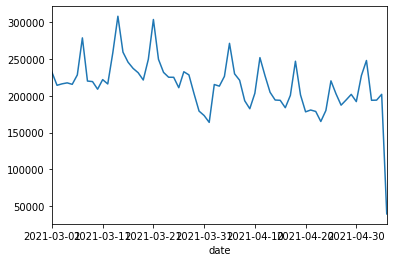

In [8]:
df_s.groupby(['date'])['page_views'].sum().plot()

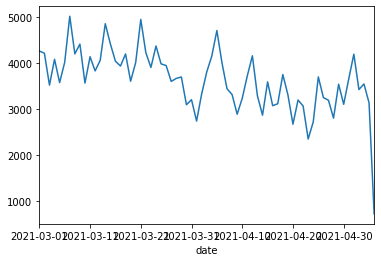

In [9]:
df_s[df_s.model=='golf'].groupby(['date'])['page_views'].sum().plot()

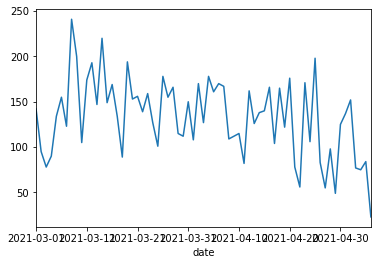

In [10]:
df_s[df_s.model=='model-s'].groupby(['date'])['page_views'].sum().plot()

In [12]:
df_s[(pd.to_datetime(df_s.date)<pd.to_datetime('20210401'))&(df_s.page_path.str.contains('de'))].page_views.sum()

5750403

In [13]:
df_s[(pd.to_datetime(df_s.date)<pd.to_datetime('20210401'))&(df_s.page_path.str.contains('fr'))].page_views.sum()

1476543

In [250]:
df_s[(pd.to_datetime(df_s.date)<pd.to_datetime('20210401'))&(df_s.page_path.str.contains('en'))].listings.count()

865348

In [251]:
df_s[(pd.to_datetime(df_s.date)<pd.to_datetime('20210401'))&(df_s.page_path.str.contains('it'))].listings.count()

1123217

In [14]:
df_s['language'] = df_s.page_path.str.slice(1,3)

In [15]:
def month(col):
    if col[5:7]=='03':
        return 'march'
    elif col[5:7]=='04':
        return 'april'
    else:
        return 'may'

In [16]:
df_s['month'] = df_s.date.apply(month)

In [18]:
df_s[df_s.month!='may'].groupby(['language', 'month'])['page_views'].sum().reset_index()

,language,month,page_views
0,de,april,4109126
1,de,march,4812807
2,en,april,597611
3,en,march,705531
4,fr,april,1189803
5,fr,march,1396398
6,ht,april,14
7,ht,march,177
8,it,april,206856
9,it,march,243871


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


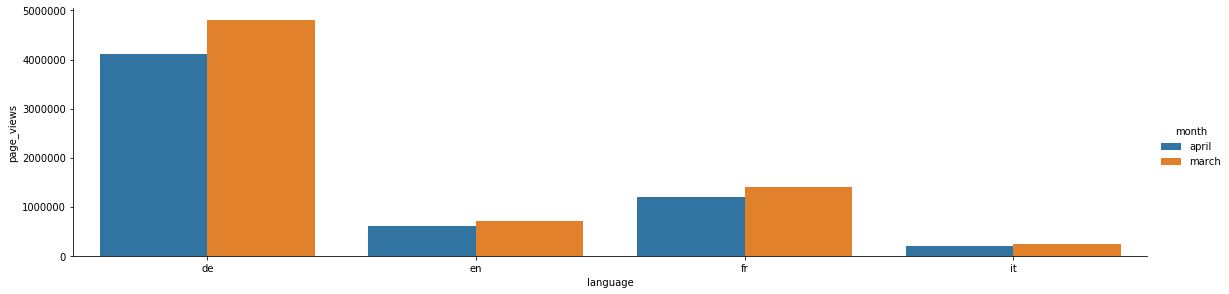

In [19]:
import seaborn as sns
x = df_s[df_s.month!='may'].groupby(['language', 'month'])['page_views'].sum().reset_index()
x = x[x.language.isin(['de', 'en', 'fr', 'it'])]
sns.catplot(x='language', y='page_views', hue='month', data=x, kind='bar', size = 4, aspect = 4)


In [24]:
df_s[df_s.month!='may'].groupby(['month', 'model'])['page_views'].sum().reset_index().sort_values(by=['page_views', 'model'], ascending = False ).head(20)

,month,model,page_views
8361,march,golf,124489
3488,april,golf,99986
6604,march,3er,74317
1710,april,3er,66922
6679,march,911,57487
1781,april,911,55154
7363,march,c-klasse,52908
9305,march,t5,46386
2458,april,c-klasse,45310
7648,march,e-klasse,44227


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


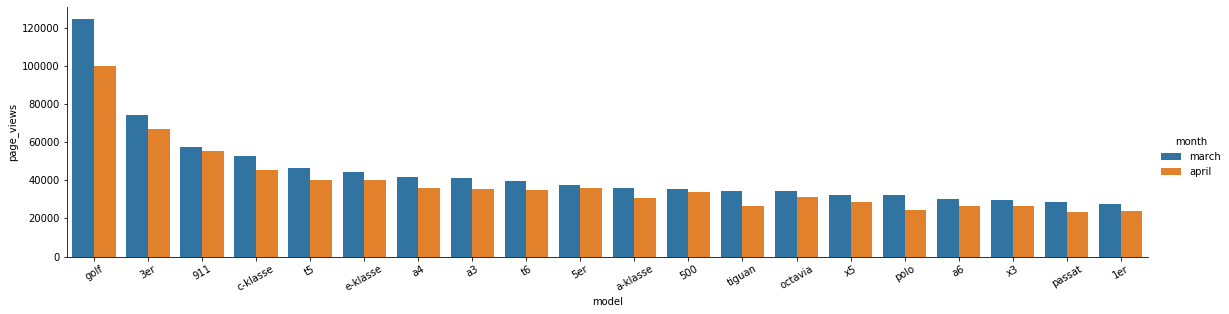

In [43]:
x = df_s[(df_s.month!='may')&(df_s.model.isin(model_lst))].groupby(['month', 'model'])['page_views'].sum().reset_index().sort_values(by=['page_views', 'model'], ascending = False )
sns.catplot(x='model', y='page_views', hue='month', data=x, kind='bar', size = 4, aspect = 4).set_xticklabels(rotation=30)


In [38]:
model_lst = list(df_s.groupby(['model'])['page_views'].sum().reset_index().sort_values(by='page_views', ascending = False).head(20).model)

In [44]:
d_b = df_s[(df_s.month=='march')&(df_s.model.isin(model_lst))].groupby(['model'])['page_views'].sum().reset_index()

In [45]:
xx = pd.merge(x, d_b, on=['model'])
xx['share'] = xx.page_views_x/xx.page_views_y
xx

,month,model,page_views_x,page_views_y,share
0,march,golf,124489,124489,1.000000
1,april,golf,99986,124489,0.803171
2,march,3er,74317,74317,1.000000
3,april,3er,66922,74317,0.900494
4,march,911,57487,57487,1.000000
5,april,911,55154,57487,0.959417
6,march,c-klasse,52908,52908,1.000000
7,april,c-klasse,45310,52908,0.856392
8,march,t5,46386,46386,1.000000
9,april,t5,40326,46386,0.869357


In [46]:
xx[xx.share<0.85]

,month,model,page_views_x,page_views_y,share
1,april,golf,99986,124489,0.803171
21,april,a-klasse,30450,35873,0.848828
25,april,tiguan,26355,34281,0.768793
31,april,polo,24612,32086,0.767064
37,april,passat,23254,28699,0.810272


In [58]:
xx[(xx.share>0.91)&(xx.month=='april')]

,month,model,page_views_x,page_views_y,share
5,april,911,55154,57487,0.959417
11,april,e-klasse,40367,44227,0.912723
19,april,5er,36130,37489,0.963749
23,april,500,33836,35227,0.960513


In [49]:
vw_lst = set(df[df.make_key=='vw'].model_key)

In [55]:
df_s[(df_s.month!='may')&(df_s.model.isin(vw_lst))].groupby(['month']).page_views.sum()

month
april    388681
march    472789
Name: page_views, dtype: int64

In [53]:
388681/472789

0.8221024600826161

In [61]:
df_s['len'] = df_s.listings.str.len()

In [62]:
set(df_s.len)

{5,
 6,
 7,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 1

In [68]:
df_s[df_s.len==19]

,Unnamed: 0,date,page_path,listings,make,model,page_views,language,month,len
10552,10552,2021-03-01,/de/auto/bentley/brooklands,"29289,28153,1264077",bentley,brooklands,2,de,march,19
10553,10553,2021-03-01,/fr/auto/bentley/brooklands,"29289,28153,1264077",bentley,brooklands,1,fr,march,19
48722,48722,2021-03-01,/fr/auto/mercedes-benz/s-klasse?firstRegistrat...,"26313,25779,1638924",mercedes-benz,s-klasse,1,fr,march,19
49374,49374,2021-03-01,/fr/auto/mercedes-benz/slr-mclaren?sortType=PR...,"1581872,23850,27819",mercedes-benz,slr-mclaren,1,fr,march,19
62886,62886,2021-03-02,/en/auto/ford?typeKey=Titanium&buyNowEligibleO...,"1314964,63323,63324",ford,NaN,1,en,march,19
...,...,...,...,...,...,...,...,...,...,...
7360894,7360894,2021-05-03,/de/auto/estate/audi?conditionType=used&cityId...,"1549574,70707,70691",audi,NaN,1,de,may,19
7397408,7397408,2021-05-03,/de/auto/search?priceTo=7500&mileageTo=150000&...,"151466,239730,28727",NaN,NaN,1,de,may,19
7512386,7512386,2021-05-05,"/de/auto/search?bodyType=bus,van&cityId=5921&r...","311207,483012,84918",NaN,NaN,1,de,may,19
7524583,7524583,2021-05-05,"/fr/auto/search?conditionType=used,demonstrati...","528270,35670,277723",NaN,NaN,1,fr,may,19


In [74]:
def check_listings(df):
    out = []
    for index, row in df.iterrows():
        l = row.listings
        check = l.str.isnumeric()
        out.append([x for x in check if x is True], l)
        

In [75]:
df_s.apply(check_listings)

AttributeError: ("'Series' object has no attribute 'iterrows'", 'occurred at index Unnamed: 0')

In [76]:
df_s.head()

,Unnamed: 0,date,page_path,listings,make,model,page_views,language,month,len
0,0,2021-03-01,/en/auto/ac/cobra,"1389343,1238744,1332335,1439058,1331507,133145...",ac,cobra,2,en,march,71
1,1,2021-03-01,/fr/auto/ac/cobra,"1389343,1238744,1332335,1439058,1331507,133145...",ac,cobra,1,fr,march,71
2,2,2021-03-01,/de/auto/ac/cobra,"1389343,1238744,1332335,1439058,1331507,133145...",ac,cobra,18,de,march,71
3,3,2021-03-01,"/de/auto/ac?conditionType=used,demonstration","1389343,1238744,1332335,1439058,1331507,133145...",ac,NaN,8,de,march,71
4,4,2021-03-01,/de/auto/coupe/ac,1331380,ac,NaN,1,de,march,7


In [80]:
out = []
for index, row in df_s.iterrows():
        l = row.listings
        check = l.isnumeric()
        out.append(check)
    

KeyboardInterrupt: 

In [82]:
df_s['listings_no_commas'] = df_s.listings.str.replace(',','')

In [84]:
df_s[~df_s.listings_no_commas.str.isnumeric()]

,Unnamed: 0,date,page_path,listings,make,model,page_views,language,month,len,listings_no_commas
